## IS 2020 Algorytmy i programowanie
### Praca domowa 01 [100 pkt]

Rozwiązaną pracę domową proszę przesłać na classroom. Prosze zmienić 'imie_nazwisko' na Państwa imię i nazwisko.

**Uwaga**

Ostateczną punktację za daną PD obniżam o 3% za każdy dzień opóźnienia PD
* czyli jeżeli ktoś odda w czasie to ma normalne punkty
* zaokrąglamy zawsze w górę (74.1 = 75)
* jeżeli ktoś odda z 4 dniowym opóźnieniem, a uzyska 85 punktów, to dostaje 85 * 0.88 = 75 punktów
* opóźnienie o 34 dni (dobry miesiąc) daje 0 punktów z automatu

Premie 
* 15 punktów dla 1 osoby która oddała PD i uzyskała co najmniej 75% punktów
* 10 punktów dla 2 osoby która oddała PD i uzyskała co najmniej 75% punktów
* 5 punktów dla 3 osoby która oddała PD i uzyskała co najmniej 75% punktów


In [1]:
# współpraca: None
# czas poświęcony na wykonanie PD: dużo 5h+

#### Zadanie 1 (15)
Matura 2010 - poziom rozszerzony zadanie 4 (Anagram)
http://www.oke.krakow.pl/inf/staticpages/index.php?page=20190429135459681

In [2]:
#a = 1/6, b = 9/9

create = open('odp_4a', mode = 'w')
create.close()
create = open('odp_4b', mode = 'w')
create.close()

with open ('anagram.txt', mode = 'r') as anagram:
    for line in anagram:
        
        line = line.split()
        suma = len(line[0])
        word1 = sorted(line[0])
        anagram_word1 = 0
        
        for element in line[1:]:
            suma += len(element)
            if word1 == sorted(element):
                anagram_word1 += 1
        if suma/len(line) == len(line[0]):
            odp4_a = open('odp_4a', mode ='a')
            odp4_a.write(' '.join(line))
            odp4_a.write('\n')
            odp4_a.close()
        if anagram_word1 == 4:
            odp4_b = open('odp_4b', mode ='a')
            odp4_b.write(' '.join(line))
            odp4_b.write('\n')
            odp4_b.close()

In [5]:
%%bash
cat odp_4a
echo ''
echo ''
cat odp_4b

abcd cdba dbac cbad dcba
rezas orkan dialog bamb pudel
wrona rossa slowo gwert rezas
cebula reksp kwiatek erspik spiker
grant hello zakon lloeh hello
kabaret kabanos kabaret gertyfu kabaret
ola ala aga oal ola
normag gmakn normag maraton normag
rezas rossa zaser sarez rezas
foto foto tofo tofo foto
romans romans normag masrom ansrom
ekran ranek lampa zakon ekran
korba orkan delpu pudel udelp
czek azer reza zare rzea
domek foto dfrty otofoto foto
cebula romans romans mansro romans
kaszmir redakcja cjardak akredak dialog
kruk kruk buka zuka nuka
agent rossa serce cerse sdfrt
qwerty wertyq wertyu magnor normag
glob lobg bogl glbo gblo
triada dariat aadrit iatdar adatri
kotek tekok teokk kokte otekk
obrus bruso soubo seawo rusob
rower werro werro owerr erwor
ipfon ipfon fonip ipfon zakop
nerka drewn korba korba korba
patyk wrona wrona wrona wrona
foto tofo foot ftoo ootf
romans drewno urezsde asdrtwe kwas
spiker kerspi erspik erspki kiersp
cygan ipfon spiker zonk grant
zator sroka gilo anw

#### Zadanie 2 (15)
Matura 2010 - poziom rozszerzony zadanie 5 (Numery pesel)
http://www.oke.krakow.pl/inf/staticpages/index.php?page=20190429135459681


pdf http://www.oke.krakow.pl/inf/filedata/files/2010_informatyka_PR2.pdf

In [17]:
# ile z grudnia

# ile jest kobiet

# w którym roku urodziło się najwięcej osob

# Wyszukaj nieprawidowe numery PESEL, w których nie zgadza sie cyfra kontrolna.
# Posortuj te numery PESEL rosnaco

# Sporzadz zestawienie liczby osób urodzonych w kolejnych dziesiecioleciach,
# Utwórz wykres ilustrujacy procentowy rozkad liczby osób w poszczególnych przedzialach


# cyfry od 0 do 5 to data urodzenia (w kolejnosci: rok, miesiec, dzien) # po 2000 + 20; 12,12,12
# cyfry od 6 do 8 to liczba porzadkowa
# cyfra 9-ta to plec (cyfra parzysta dla kobiet, nieparzysta dla mezczyzn)
# cyfra 10-ta to cyfra kontrolna

# cyfra kontrolna
# 1, 3, 7, 9, 1, 3, 7, 9, 1, 3
# suma % 10 = reszta
# if reszta == 0: control_number = 0
# else: control_number = 10 - reszta

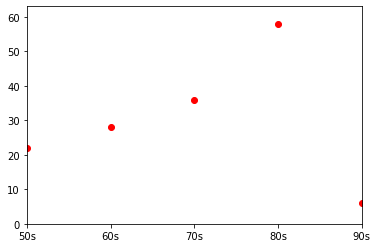

In [37]:
# d = 1/4 nieprawidlowe pesel podobno nie dziala

import matplotlib.pyplot as plt

def matura_sprawdzanie(pesel):
    suma_kontrolna = 0
    multiplier = 1
    for number in pesel[:-1]:
        suma_kontrolna += ord(str( (ord(number) - ord('0')) * multiplier )[-1] ) - ord('0')
        if multiplier == 9:
            multiplier = -1
        multiplier += 2
    if suma_kontrolna % 10 != 0:
        if 10 - (suma_kontrolna % 10) != ( ord(pesel[-1]) - ord('0') ):
            return False
    else:
        if 0 != (ord(pesel[-1]) - ord('0')):
            return False
    return True


def gov_sprawdzanie(pesel):
    suma_kontrolna = 0
    multiplier = 1
    for number in pesel[:-1]:
        suma_kontrolna += ord(str( (ord(number) - ord('0')) * multiplier )[-1] ) - ord('0')
        if multiplier == 9:
            multiplier = -1
        multiplier += 2
    if suma_kontrolna > 9:
        suma_kontrolna = ord(str(suma_kontrolna)[-1]) - ord('0')
    if suma_kontrolna > 0:
        suma_kontrolna = 10 - suma_kontrolna
    if suma_kontrolna != ord(pesel[-1]) - ord('0'):
        return False
    return True


results = {'december': 0, 'women': 0, 'year': {}, 'not_cool_pesel': [], 'decade_stats': {}}
#print(results)

for i in range(0,10):
    results['decade_stats'][str(i)+'0s'] = 0

with open ('pesel.txt', mode = 'r') as dane_osobowe:
    for pesel in dane_osobowe:
        # 89 10 01 927 5 2
        if pesel[2:4] == '12' or pesel[2:4] == '32':
            results['december'] += 1
        if ( ord(pesel[9]) - ord('0') ) %2 == 0:
            results['women'] += 1
        
        century = '19'
        if (ord(pesel[2]) - ord('0'))* 10 > 20:
            century = '20'
        try:
            results['year'][century + pesel[0:2]] += 1
        except KeyError:
            results['year'][century + pesel[0:2]] = 1
        
        if matura_sprawdzanie(pesel[:-1]) == False:
            results['not_cool_pesel'].append(pesel[:-1])

max_people = 0
max_year = 0
for year, people in results['year'].items():
    if people > max_people:
        max_people = people
        max_year = year
    results['decade_stats'][year[2]+'0s'] += people

remove_void_decade = [decade for decade, number_ppl in results['decade_stats'].items() if number_ppl == 0]
remove_void_decade.reverse()
for decade_remove in remove_void_decade:
    del results['decade_stats'][decade_remove]

results['not_cool_pesel'] = sorted(results['not_cool_pesel'])

#print(results)

with open ('pesel_results', 'w') as result:
    result.write('W grudniu urodzilo sie: {} pracownikow\n'.format(results['december']))
    result.write('Jest {} kobiet\n'.format(results['women']))
    result.write('Najwiecej osob urodzilo sie w {}r - {}\n'.format(max_year, max_people))
    result.write('Zle nr pesel:\n')
    for pesel in results['not_cool_pesel']:
        result.write(pesel+'\n')


plt.plot([el for el in results['decade_stats'].keys()], [el for el in results['decade_stats'].values()], 'ro')
plt.axis(['50s', '90s', 0, max([el for el in results['decade_stats'].values()])+5])
plt.show()


In [7]:
%%bash
cat pesel_results

W grudniu urodzilo sie: 20 pracownikow
Jest 74 kobiet
Najwiecej osob urodzilo sie w 1989r - 29
Zle nr pesel:
50021011352
50101111305
50102636355
51011153311
51102573842
52101156863
52110446139
53122299122
54020837137
54043010088
55110906690
55123128973
56111161549
57073163051
57102202414
58122188027
59031152059
59042989686
59083036077
59110570565
60061144469
60102890107
61100157652
61121020469
62033089803
62092569090
63092608644
63102092944
64022301455
64040919575
64063159211
65092056892
66063014631
66100294134
66100651663
66111176164
66113183995
67103111042
67112966668
67113048790
67120749923
68112117597
69030626134
69122174118
70032057433
70053179170
70120794633
71093058856
72031096705
73010399576
73070871368
73103000844
73112328551
74120284541
74121108598
75113162747
75121005045
75123199317
76043169949
76121186303
77072919805
77111084850
77120835871
78011115028
78103188695
78123189018
79012564484
79070627831
79101146737
79110673709
81081010863
82072219267
83041812338
83041947282
840

#### Zadanie 3 (15)
Matura 2011- poziom rozszerzony zadanie 5 (Wystawa psów)
http://www.oke.krakow.pl/inf/staticpages/index.php?page=20190429140138994

In [47]:
# osoby.txt
# id_osoby; imię; nazwisko; nr telefonu
# o001;Adam;Roztoka;501358358

# psy.txt
# id_psa; rasa; wiek; płeć; liczba zdobytych medali; id_osoby
# 1;wyżeł węgierski krótkowłosy;4;samica;1;o059


# a) Podaj liczbę samców oraz liczbę samic wśród psów                                        done
# b) Utwórz zestawienie podające nazwiska i imiona osób, które mają więcej niż 8 psów        done
#    Zestawienie powinno być uporządkowane alfabetycznie według nazwisk.
# c) Podaj imię i nazwisko osoby, której psy zdobyły łącznie najwięcej medali, oraz podaj    done
#    liczbę tych medali.
# d) Podaj liczbę osób posiadających owczarki. Zwróć uwagę na to, że nazwa rasy może         done
#    składać się z kilku wyrazów oraz że jedna osoba może posiadać kilka owczarków tej
#    samej rasy lub różnych ras. 


# c = 5

samiec = 0
samica = 0
owczarek_ppl = 0
ilosc = {} # ilosc = {'wlasciciel': [psy, medale]}

with open ('psy.txt', 'r') as pieski:
    for piesek in pieski:
        dane_piesek = piesek.split(';')
        dane_piesek[-1] = dane_piesek[-1][:-1]
        if dane_piesek[3] == 'samica':
            samica += 1
        else:
            samiec += 1
        
        if 'owczarek' in dane_piesek[1]:
            owczarek_ppl += 1 # wiecej wlascicieli
        
        medale = sum([(ord(num)-ord('0'))*10**i for i, num in enumerate (dane_piesek[-2][::-1])])
        try:
            ilosc[dane_piesek[-1]][0] += 1
            ilosc[dane_piesek[-1]][1] += medale
        except KeyError:
            ilosc[dane_piesek[-1]] = [1, medale]
            
more_than_8 = []
most_awards = ['a', 0]
for key, val in ilosc.items():
    if val[0] > 8:
        more_than_8.append(key)
    if val[1] > most_awards [1]:
        most_awards = [key, val[1]]
more_than_8.sort()

#print(more_than_8)
#print(most_awards)

more_than_8_ppl = []
with open ('results_psy', 'w') as results:  
    results.write('ilosc samic: {}\nilosc samcow: {}\n'.format(samiec,samica))
    results.write('ilosc osob posiadajcych owczarki: {}\n'.format(owczarek_ppl))
    
    with open ('osoby.txt', 'r') as wlasciciele:
        i = 0
        for wlasciciel in wlasciciele:
            wlasciciel = wlasciciel[:-1].split(';')
            if wlasciciel[0] == most_awards[0]:
                most_awards.insert(1, wlasciciel[2] + ' ' + wlasciciel[1])
                del most_awards[0]
            if len(more_than_8) == len(more_than_8_ppl):
                continue
            if wlasciciel[0] == more_than_8[i]:
                more_than_8_ppl.append(wlasciciel[2] + ' ' + wlasciciel[1])
                i += 1
        results.write('Osoba posiadajaca w sumie najwieksza ilosc medali {} ({})\n'.format(most_awards[0],most_awards[1]))
        results.write('Osoby posiadajace wiecej niz 8 psow:\n')
        more_than_8_ppl.sort()
        for person in more_than_8_ppl:
            results.write(person + '\n')


In [8]:
%%bash
cat results_psy

ilosc samic: 492
ilosc samcow: 508
ilosc osob posiadajcych owczarki: 154
Osoba posiadajaca w sumie najwieksza ilosc medali Tobera Krystyna (41)
Osoby posiadajace wiecej niz 8 psow:
Antczak Edyta
Bielawska Dagmara
Bugajno Kamila
Gabowski Pawel
Jaworski Eugeniusz
Kaliszewski Kacper
Kowal Marcin
Kowalski Ryszard
Kwiatkowski Marcin
Szargawinska Danuta
Szczupak Anna
Tobera Krystyna
Wroclawski Rafal
Wysocka Maria


#### Zadanie 4 (15)
Matura 2011- poziom rozszerzony zadanie 6 (Liczby inaczej)
http://www.oke.krakow.pl/inf/staticpages/index.php?page=20190429140138994

In [1]:
# suma nie dziala
parzyste = 0
dziewiec_cyfr = []
max = ''
with open ('liczby.txt','r') as liczby_inaczejjj:
    for liczba in liczby_inaczejjj:
        liczba = liczba[:-1]
        
        if liczba[-1] == '0':
            parzyste += 1
        if len(liczba) == 9:
            dziewiec_cyfr.append(liczba)
        if len(liczba) > len(max):
            max = liczba
        if len (liczba) == len(max):
            if liczba > max:
                max = liczba
suma = sum([(ord(cyfra) - ord('0'))*(2**i) for i, cyfra in enumerate(liczba[::-1]) for liczba in dziewiec_cyfr])
temp = []
while suma != 0:
    temp.append(str(suma%2))
    suma = int(suma/2)
temp.reverse()
suma = ''.join(temp)


with open ('results_liczby', 'w') as results:
    results.write('ilosc liczb parzystych wynosi: {}\n'.format(parzyste))
    results.write('suma wszystkich liczb dziewieciocyfrowych wynosi: {}\n'.format(suma))
    results.write('najwieksza liczba to: ' + max)

In [9]:
%%bash
cat results_liczby

ilosc liczb parzystych wynosi: 497
suma wszystkich liczb dziewieciocyfrowych wynosi: 110000000001100110001
najwieksza liczba to: 1111101111110110

In [12]:
if '11000' > '10111':
    print('wieksza')

wieksza


#### Zadanie 5 (10)
Matura 2013- poziom podstawowy zadanie 4 (Napisy)
http://www.oke.krakow.pl/inf/staticpages/index.php?page=20190429140425175

a) Podaj, ile jest napisów o parzystej długości.
b) Podaj, ile jest napisów, które zawierają taką samą liczbę zer i jedynek.
c) Podaj, ile jest napisów składających się z samych zer, oraz podaj, ile jest napisów
składających się z samych jedynek.
d) Dla każdej liczby k  2, 3, ...,16 podaj liczbę napisów o długości k znajdujących się
w pliku napisy.txt, tzn. podaj, ile jest napisów 2-znakowych, ile jest napisów
3-znakowych itd.

In [45]:
parzyste = 0
rowna_ilosc10 = 0
same_1 = 0
same_0 = 0
dlugosci = {i : 0 for i in range(1,17)}

with open ('napisy.txt', 'r') as napisy_all:
    for napis in napisy_all:
        napis = napis[:-1]
        #print(napis)
        dlugosci[len(napis)] += 1
        
        if len(napis) % 2 == 0:
            parzyste += 1
            if sum([1 for i in napis if i == '1']) == len(napis)/2:
                rowna_ilosc10 += 1
                #continue
    
        if not('1' in napis):
            same_0 += 1
        elif not('0' in napis):
            same_1 += 1

    

with open ('results_napisy', 'w') as results:
    results.write('ilosc liczb o parzystej dlugosci wynosi: {}\n'.format(parzyste))
    results.write('ilosc liczb w których ilosc 0 rowna sie ilosci 1 wynosi: {}\n'.format(rowna_ilosc10))
    results.write('ilosc liczb zlozonych z samych 1 wynosi: {}\n'.format(same_1))
    results.write('ilosc liczb zlozonych z samych 0 wynosi: {}\n'.format(same_0))
    for dlugosc, ilosc in dlugosci.items():
        results.write('{} : {}\n'.format(dlugosc, ilosc))

In [10]:
%%bash
cat results_napisy

ilosc liczb o parzystej dlugosci wynosi: 504
ilosc liczb w których ilosc 0 rowna sie ilosci 1 wynosi: 110
ilosc liczb zlozonych z samych 1 wynosi: 50
ilosc liczb zlozonych z samych 0 wynosi: 32
1 : 0
2 : 43
3 : 38
4 : 37
5 : 57
6 : 53
7 : 68
8 : 78
9 : 103
10 : 83
11 : 90
12 : 86
13 : 81
14 : 68
15 : 59
16 : 56


#### Zadanie 6 (15)
zadanie 4! Słowa binarne Chodzi o 'starą' maturę z roku 2015 poziom rozszerzony arkusz 2
http://www.oke.krakow.pl/inf/staticpages/index.php?page=20190429140540817

W pliku slowa_binarne.txt zapisano 1000 słów zerojedynkowych o długościach od 2 do 25
znaków, w każdym wierszu po jednym słowie. Napisz program, który da odpowiedzi
do poniższych zadań. Odpowiedzi zapisz w pliku wynik4.txt, a każdą odpowiedź
poprzedź numerem zadania.
Blokiem w słowie nazywamy ciąg kolejnych takich samych znaków, którego nie można
wydłużyć. W słowie 100110001 mamy 5 bloków: 1, 00, 11, 000, 1. 
    
    
Podaj, ile jest słów w pliku slowa.txt, w których liczba zer jest większa od liczby
jedynek.
Przykład:
Dla zestawu danych:
101011010011001100111
10001001
0001000
101010011100
000011
1111100
wynikiem jest liczba 3 (3 podkreślone słowa spełniają warunki zadania). 


Podaj, ile jest słów składających się z dokładnie dwóch niepustych bloków: pierwszego
składającego się samych zer i drugiego składającego się z samych jedynek.
Przykład:
Dla zestawu danych:
100010000100
000000111111
00000000
11111111110000
00000000000000001
wynikiem jest liczba 2 (2 podkreślone słowa spełniają warunki zadania). 


Podaj długość najdłuższego bloku złożonego z samych zer pojawiającego się w słowach
w pliku slowa.txt. Wypisz wszystkie słowa z tego pliku, które zawierają taki najdłuższy
blok złożony z samych zer.
Przykład:
Dla zestawu słów:
100010000100
001
000
10101001110000
000011
Wynikami są liczba 4 oraz podkreślone słowa. 

In [52]:
# slowa_binarne.txt
# b 1/5
# c 0/7
wiecej_zer = 0
same_zera = 0
dwa_bloki = 0
with open ('slowa_binarne.txt', 'r') as file:
    for word in file:
        zero = 0
        index_one = -1
        word = word[:-1]
        
        for index, letter in enumerate(word):
            if letter == '0':
                zero += 1
            elif index_one < 0:
                index_one = index
        
        if zero > int(len(word)/2):
            wiecej_zer += 1
            if zero == len(word):
                same_zera += 1
        if zero == index_one:
            dwa_bloki += 1
            
    

with open ('results_slowa_binarne', 'w') as results:
    results.write(f'jest {same_zera} slow zlozonych z samych zer\n')
    results.write(f'jest {wiecej_zer} slow w ktorych jest wiecej zer niz jedynek\n')
    results.write(f'jest {dwa_bloki} slow zlozonych z dwoch blokow (najpierw zera, potem jedynki)\n')

In [11]:
%%bash
cat results_slowa_binarne

jest 27 slow zlozonych z samych zer
jest 441 slow w ktorych jest wiecej zer niz jedynek
jest 69 slow zlozonych z dwoch blokow (najpierw zera, potem jedynki)


#### Zadanie 7 (15)
Matura 2016- poziom rozszerzony zadanie 5 (Gra w życie)
http://www.oke.krakow.pl/inf/staticpages/index.php?page=20190429140626113


link do pdf: http://www.oke.krakow.pl/inf/filedata/files/MIN-R2_1P-162_s.pdf


następne pokolenie:

• Komórka jest żywa i ma dwóch lub trzech żywych sąsiadów (inaczej umiera
z samotności lub na skutek zbyt dużego zagęszczenia).

• Komórka jest martwa, ale ma dokładnie trzech żywych sąsiadów. 


In [1]:
# ....................
# ....................
# ....................
# ....................
# .......X.XX.........
# .......XXX..........
# ........X...........
# ....................
# ....................
# ....................
# ....................
# ....................

# 12 wierszy, 20 kolumn

# on nie ma pliku gra_first.txt

results = {'gen2' : 0, 'gen37' : 0, 'same' : -1, 'same_how_many' : 0}

# reset do pierwszej wersji 
with open('gra_first.txt', 'r') as first:
    with open ('gra.txt', 'w') as new_game:
        for line in first:
            new_game.write(line)
    

how_many_gen = 60
# zamiast otwierać, zapisywac otwierac, zapisywac, .... można operowac w petli na tablicy
for generation in range(1,how_many_gen):
    
    # otwiera uklad komorek i wpisuje do dwuwymiarowej tablicy
    current = []
    with open('gra.txt', 'r') as game_file:
        for line in game_file:
            line = line[:-1]
            line = [0 if letter == '.' else -10 for letter in line]
            current.append(line)
           
    # wyswietla
    i = 0
    for el in current:
        print(''.join(['X' if letter == -10 else '.' for letter in el]))
        # podpunkty a i b ----------------------------------------------------
        if generation == 2:
            results['gen2'] += sum([1 for letter in el if letter == -10])
        if generation == 37:
            if i == 0 or i == 2:
                results['gen37'] += sum([1 for letter in el[17::] if letter == -10])
            if i == 1:
                results['gen37'] += sum([1 for letter in [el[17],el[19]] if letter == -10])
            i += 1
        # -------------------------------------------------------------------
    print('\n')

    # okreslanie zywych komorek w next_gen
    for i in range(len(current)):
        for j in range(len(current[i])):
            if current[i][j] < 0:

                j_diff1 = 0
                j_diff2 = 0
                i_diff1 = 0
                i_diff2 = 0

                if j == 0:
                    j_diff1 = len(current[i])
                if j == len(current[i]) - 1:
                    j_diff2 = -len(current[i])
                if i == 0:
                    i_diff1 = len(current)
                if i == len(current) - 1:
                    i_diff2 = -len(current)

                current[i][j-1+j_diff1]           += 1  # +j_diff1
                current[i-1+i_diff1][j-1+j_diff1] += 1  # +j_diff1  +i_diff1
                current[i-1+i_diff1][j]           += 1  #           +i_diff1
                current[i-1+i_diff1][j+1+j_diff2] += 1  # +j_diff2  +i_diff1
                current[i][j+1+j_diff2]           += 1  # +j_diff2
                current[i+1+i_diff2][j+1+j_diff2] += 1  # +j_diff2  +i_diff2
                current[i+1+i_diff2][j]           += 1  #           +i_diff2
                current[i+1+i_diff2][j-1+j_diff1] += 1  # +j_diff1  +i_diff2
                
    # podpunkt c ------------------------------------------------
    # mozna go lepiej wplesc w calosc
    if results['same'] == -1:
        
        current_c = []
        for line in current:
            temp = []
            for number in line:
                if number == -8 or number == -7 or number == 3:
                    temp.append('X')
                else:
                    temp.append('.')
            current_c.append(''.join(temp))
        
        previous = []
        with open('gra.txt', 'r') as game_file:
            for line in game_file:
                line = line[:-1]
                previous.append(line)
        
        if current_c == previous:
            results['same'] = generation
            for line in current_c:
                results['same_how_many'] += sum([1 for letter in line if letter == 'X'])
            break
    #------------------------------------------------------------------
    
    # przepisuje uklad komorek do pliku
    with open ('gra.txt', 'w') as next_gen:
        for i in range(len(current)):
            for j in range(len(current[i])):
                if current[i][j] == -8 or current[i][j] == -7 or current[i][j] == 3:
                    next_gen.write('X')
                else:
                    next_gen.write('.')
            next_gen.write('\n')

# zawsze ma 8 sasiadow
# kazda komorka jest oznaczana liczba ujemna
# jesli znaleziona zostaje komorka to wszystkie dookoła maja + 1
# komórka jest dalej żywa jesli ma -8 lub -7 
# nowa komórka jest żywa jeśli == 3


print('\n######################'*2)
print('Koniec')
print(results)
        
with open('results_gra', 'w') as result_file:
    result_file.write('w drugim pokoleniu jest zywych {} komorek\n'.format(results['gen2']))
    result_file.write('w 37 generacji komurka w 2 wierszu 19 kolumnie ma {} sąsiadów\n'.format(results['gen37']))
    result_file.write('populacja stabilizyje sie w {} pokoleniu, sklada sie z {} zywych komorek\n'.format(results['same'],results['same_how_many']))


....................
....................
....................
....................
.......X.XX.........
.......XXX..........
........X...........
....................
....................
....................
....................
....................


....................
....................
....................
....................
.......X.XX.........
.......X..X.........
.......XXX..........
....................
....................
....................
....................
....................


....................
....................
....................
....................
........XXX.........
......XX..X.........
.......XXX..........
........X...........
....................
....................
....................
....................


....................
....................
....................
.........X..........
.......XXXX.........
......X...X.........
......X..X..........
.......XXX..........
....................
....................
....................
.......

In [15]:
%%bash
cat results_gra
echo ''
cat gra.txt

w drugim pokoleniu jest zywych 8 komorek
w 37 generacji komurka w 2 wierszu 19 kolumnie ma 4 sąsiadów
populacja stabilizyje sie w 50 pokoleniu, sklada sie z 8 zywych komorek

....................
....................
....................
....................
..XX................
..XX................
....................
..XX................
..XX................
....................
....................
....................


In [2]:
# zadanie poprzednie zajecia
with open('autor_tytul') as song:
    slowo_ilosc = {}
    for line in song:
        line = line.split()
        for word in line:
            word = word.replace(',', '') # moze byc lepiej
            word = word.replace('.', '')
            word = word.replace('?', '')
            word = word.replace('!', '')
            word = word.replace('"', '')
            word = word.replace('\'', '')
            word = word.replace('(', '')
            word = word.replace(')', '')
            word = word.lower()
            try:
                slowo_ilosc[word] = slowo_ilosc[word] + 1
            except KeyError:
                slowo_ilosc[word] = 1
            except Exception as E:
                print(E)
    print(slowo_ilosc)

{'they': 3, 'may': 1, 'be': 2, 'giants': 1, 'istambul': 1, 'istanbul': 11, 'was': 4, 'constantinople': 18, 'now': 3, 'its': 3, 'not': 3, 'been': 4, 'a': 6, 'long': 4, 'time': 4, 'gone': 4, 'turkish': 1, 'delight': 1, 'on': 1, 'moonlit': 1, 'night': 1, 'every': 1, 'gal': 1, 'in': 4, 'lives': 1, 'so': 3, 'if': 1, 'youve': 1, 'date': 1, 'shell': 1, 'waiting': 1, 'even': 2, 'old': 2, 'new': 4, 'york': 2, 'once': 2, 'amsterdam': 2, 'why': 5, 'changed': 2, 'it': 4, 'i': 2, 'cant': 4, 'say': 2, 'people': 2, 'just': 2, 'liked': 2, 'better': 2, 'that': 2, 'way': 2, 'take': 2, 'me': 2, 'back': 4, 'to': 4, 'no': 2, 'you': 2, 'go': 2, 'did': 3, 'get': 3, 'the': 6, 'works': 3, 'thats': 3, 'nobodys': 3, 'business': 3, 'but': 3, 'turks': 3}
